## Libraries for reinforcement 

In [9]:
%matplotlib inline
from scipy import *
import sys, time

from pybrain.rl.environments.mazes import Maze, MDPMazeTask
from pybrain.rl.learners.valuebased import ActionValueTable
from pybrain.rl.agents import LearningAgent
from pybrain.rl.learners import Q, SARSA
from pybrain.rl.experiments import Experiment
from pybrain.rl.environments import Task

## Visualization

In [2]:
import pylab
pylab.gray()
pylab.ion()


### <font color='blue'>The Environment is the world, in which the agent acts. One of these environments is the maze environment. It creates a labyrinth with free fields, walls, and an goal point. An agent can move over the free fields and needs to find the goal point.</font>

#### Let’s define the maze structure, a simple 2D numpy array, where 1 is a wall and 0 is a free field

In [ ]:
structure = array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                   [1, 0, 0, 1, 0, 0, 0, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 0, 1, 0, 1],
                   [1, 0, 0, 1, 0, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 1, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 0, 1],
                   [1, 0, 0, 0, 0, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1, 1, 1, 1, 1]])

### We create the environment with the structure as first parameter and the goal field tuple as second parameter

In [4]:
environment = Maze(structure, (7, 7))

### <font color='green'>The controller in PyBrain is a module, that takes states as inputs and transforms them into actions. For value-based methods, like the Q-Learning algorithm we will use here, we need a module that implements the ActionValueInterface.</font>

#### We initialize the table with 1 everywhere. This is not always necessary but will help converge faster, because unvisited state-action pairs have a promising positive value and will be preferred over visited ones that didn’t lead to the goal.

In [5]:
controller = ActionValueTable(81, 4)
controller.initialize(1.)


### <font color='blue'>Several classes of RL learners are currently implemented in PyBrain: black box optimizers, direct search methods, and value-based learners. </font>

#### The classical Reinforcement Learning mostly consists of value-based learning, in which of the most well-known algorithms is the Q-Learning algorithm

In [6]:
learner = Q()
agent = LearningAgent(controller, learner)

### <font color='orange'>In PyBrain, there is a special component that connects environment and agent: the task. A task also specifies what the goal is in an environment and how the agent is rewarded for its actions. </font>

### The Task also decides when an episode is over. Environments usually bring along their own tasks. The Maze environment for example has a MDPMazeTask, that we will use

In [7]:
task = MDPMazeTask(environment)

### In order to learn something, we create an experiment, tell it both task and agent (it knows the environment through the task) and let it run for some number of steps or infinitely

KeyboardInterrupt: 

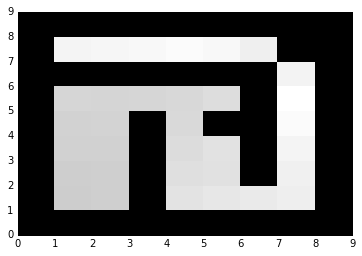

In [11]:
experiment = Experiment(task, agent)

while True:
    experiment.doInteractions(5)#experiment.doInteractions(100)
    agent.learn()
    agent.reset()

    pylab.pcolor(controller.params.reshape(81,4).max(1).reshape(9,9))
    pylab.draw()

In [12]:
import gym
import numpy as np

In [13]:
env = gym.make('FrozenLake-v0')

[2016-10-25 18:35:48,006] Making new env: FrozenLake-v0


In [14]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .85
y = .99
num_episodes = 2000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

### <font color ='brown'>1. Need to find some environment. In this case, it would be one of the best values I got</font>

### <font color ='brown'>2. We need a task or write one. This is the part which tells what to do. The previous one was about solving a maze. In our case, it is about finding an optimal value. </font>

